In [1]:
import ROOT as root
import uproot
import numpy as np
import time
import matplotlib.pyplot as plt
import tables
import h5py

Welcome to JupyROOT 6.22/04


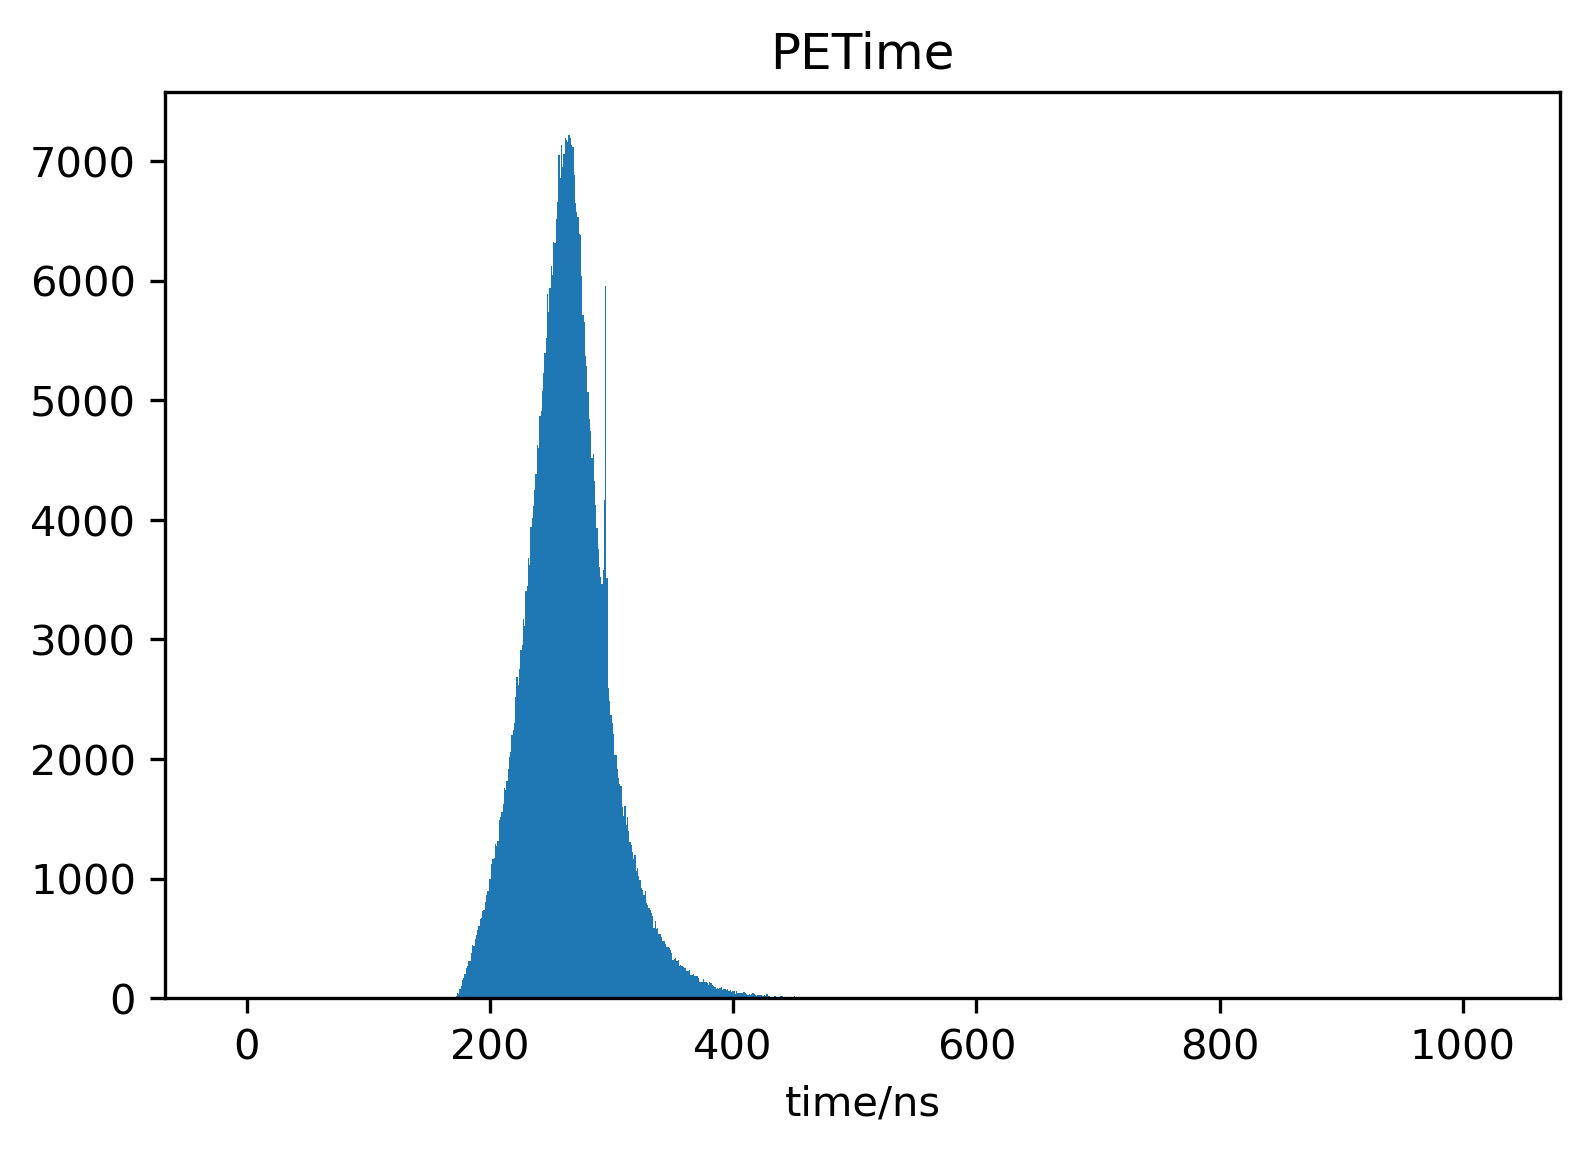

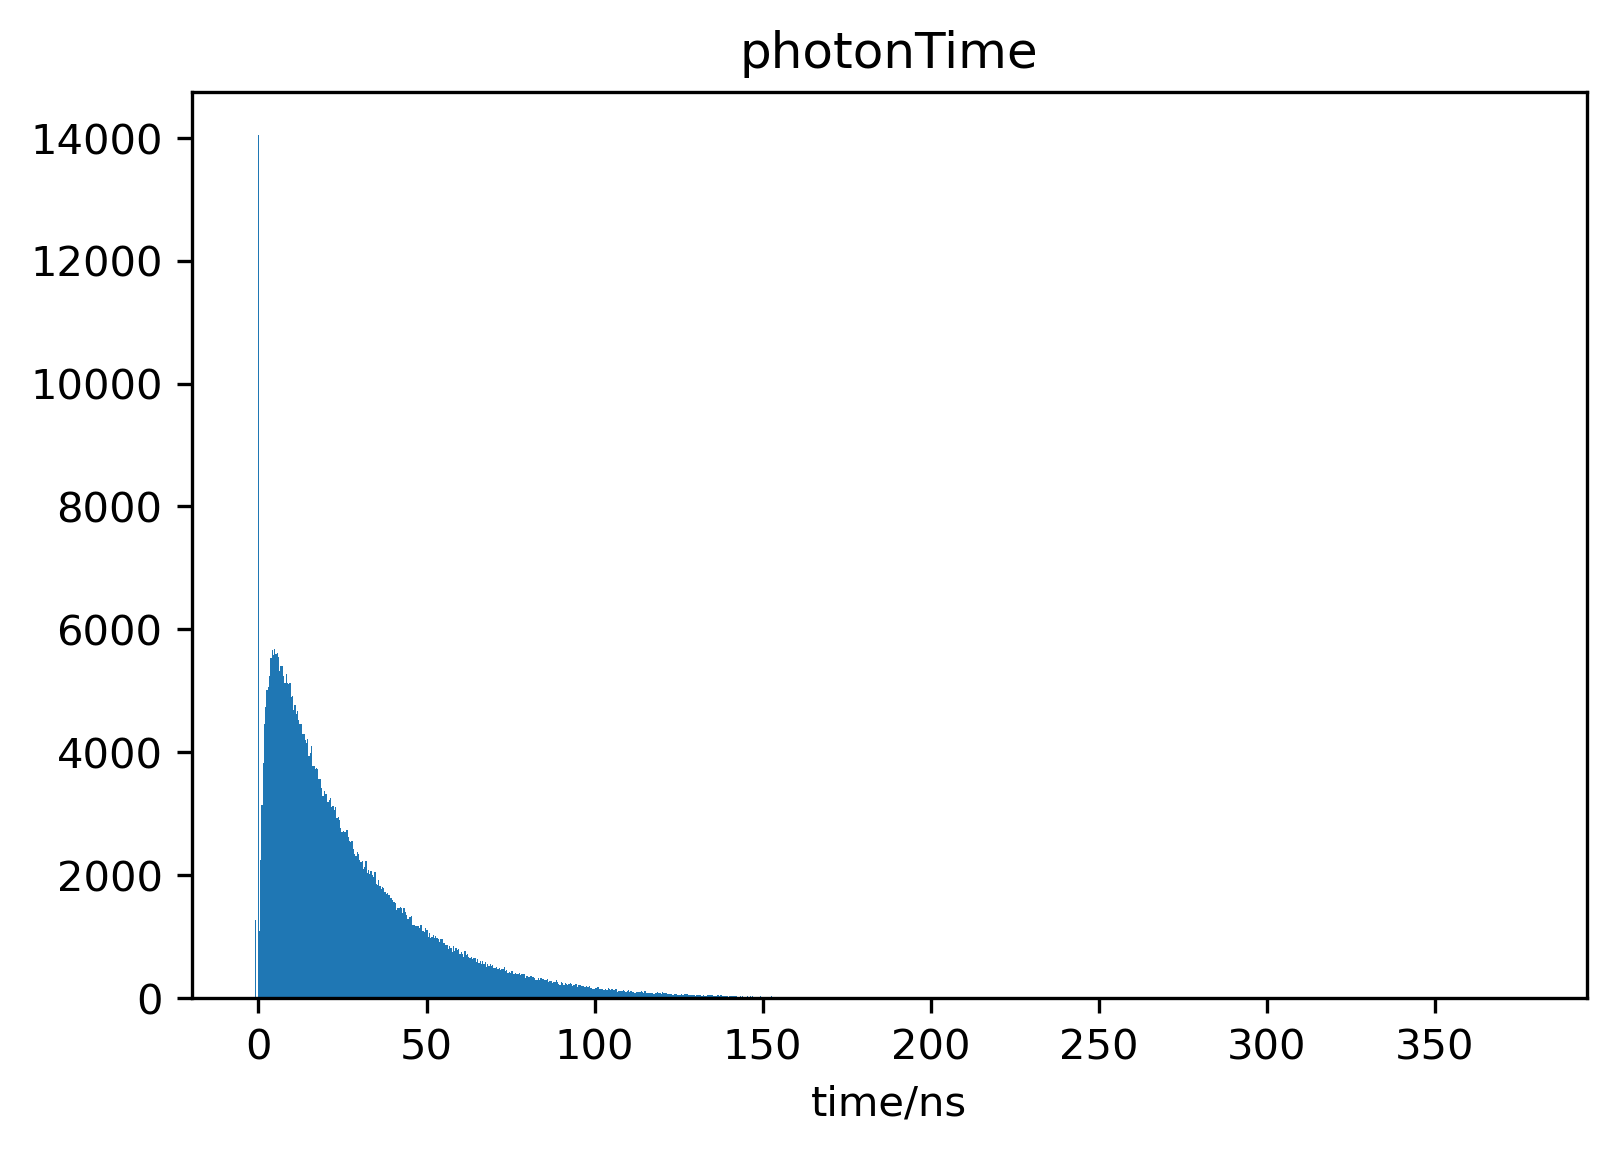

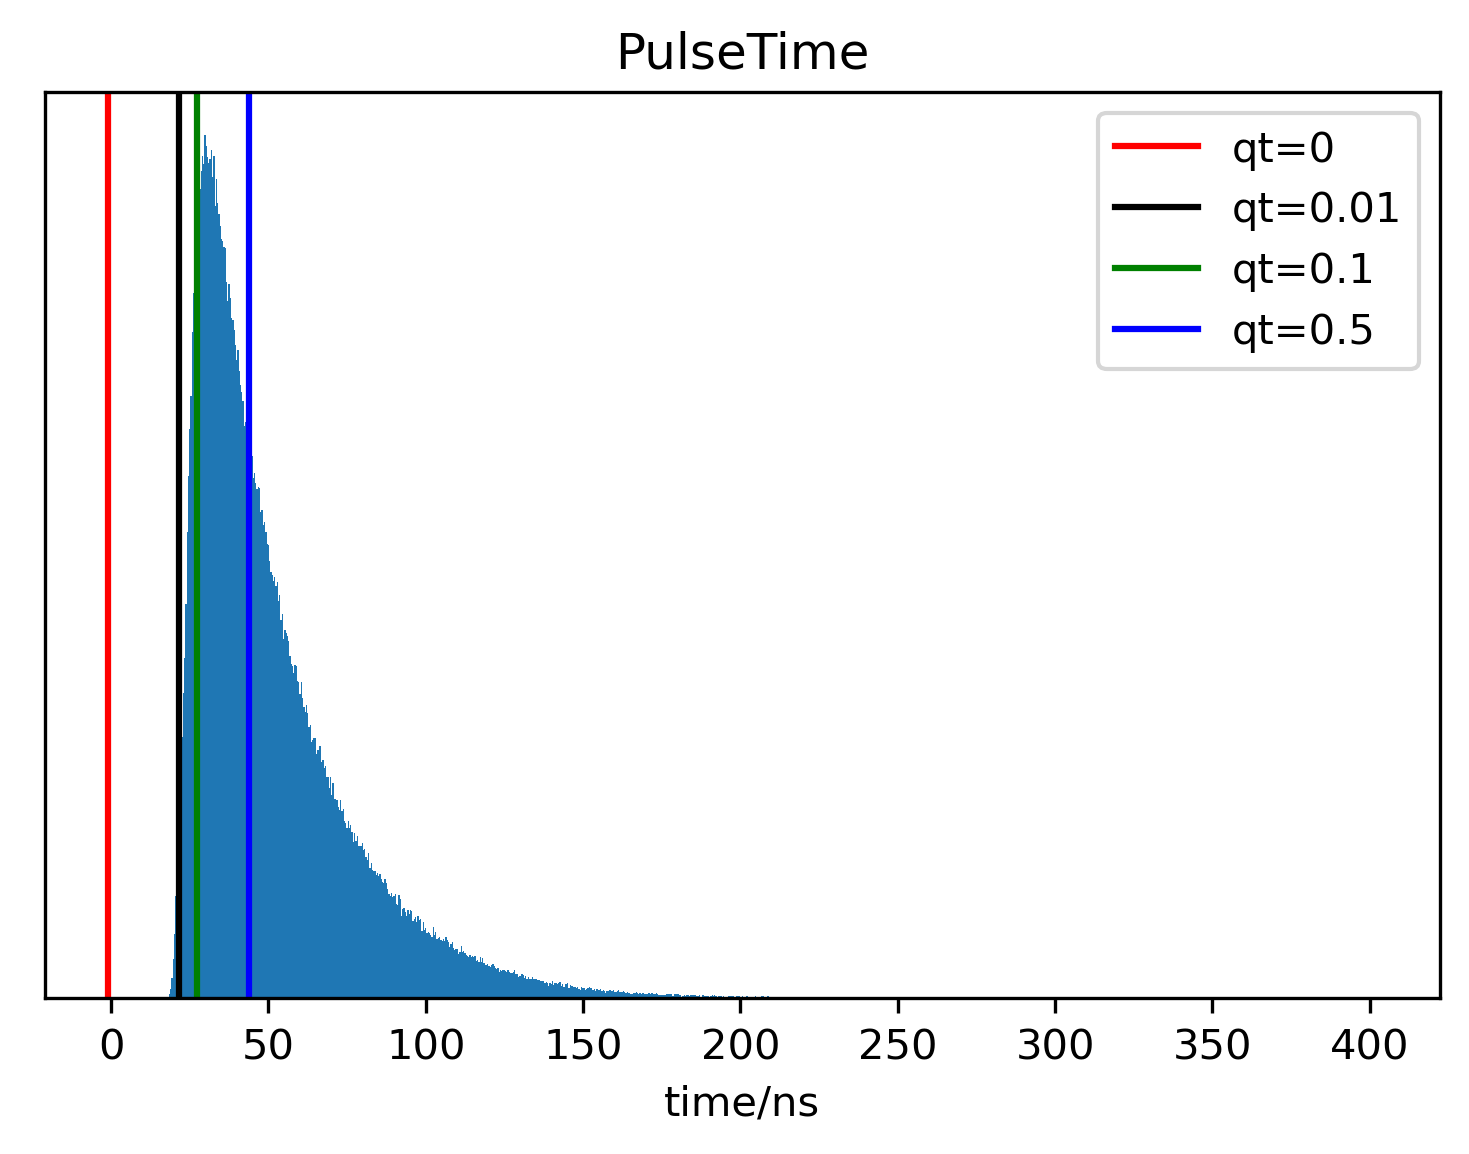

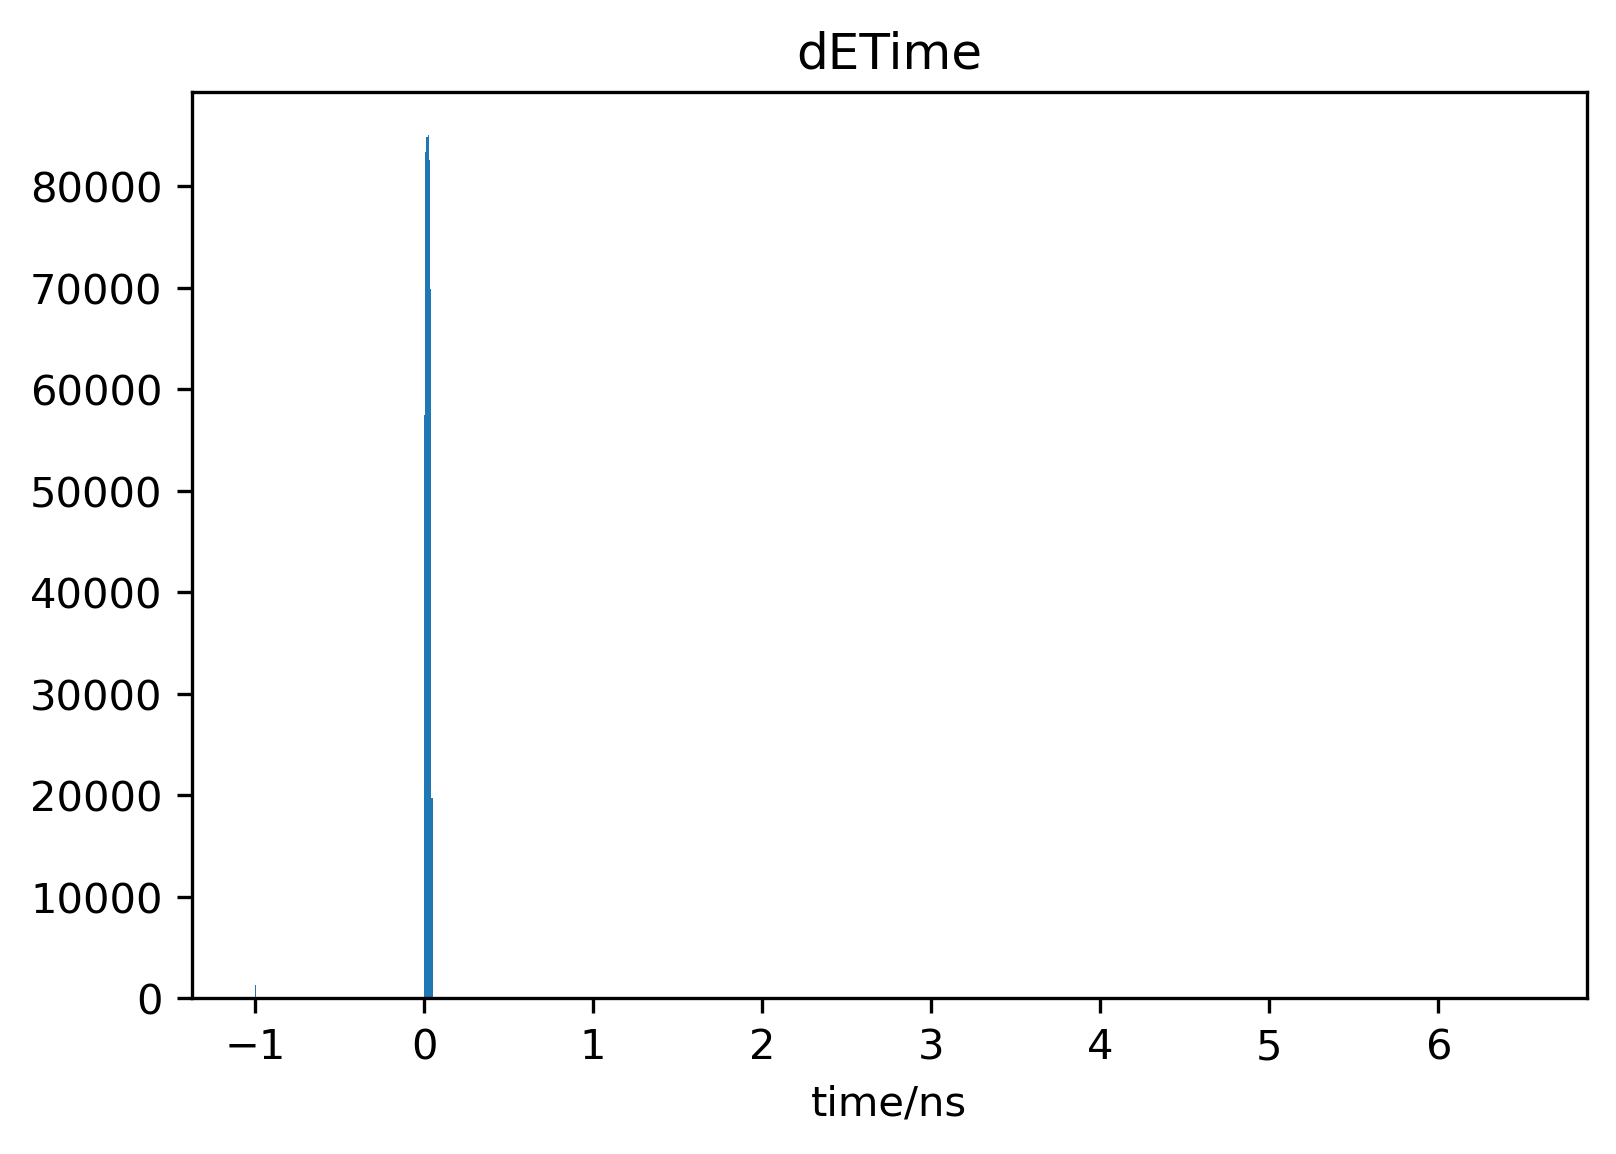

In [2]:
h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/2.0MeV_015/1t_+0.60.h5')
plt.figure(num=1, dpi=300)
plt.hist(h.root.GroundTruth[:]['PETime'],bins=1000)
plt.title('PETime')
plt.xlabel('time/ns')
plt.show()
plt.figure(num=2, dpi=300)
plt.hist(h.root.GroundTruth[:]['photonTime'],bins=1000)
plt.title('photonTime')
plt.xlabel('time/ns')
plt.show()
plt.figure(num=3, dpi=300)
plt.hist(h.root.GroundTruth[:]['PulseTime'],bins=1000)
plt.title('PulseTime')
plt.xlabel('time/ns')
plt.yticks([],[])
plt.axvline(np.quantile(h.root.GroundTruth[:]['PulseTime'],0), color='r', label='qt=0')
plt.axvline(np.quantile(h.root.GroundTruth[:]['PulseTime'],0.01), color='k', label='qt=0.01')
plt.axvline(np.quantile(h.root.GroundTruth[:]['PulseTime'],0.1), color='g', label='qt=0.1')
plt.axvline(np.quantile(h.root.GroundTruth[:]['PulseTime'],0.5), color='b', label='qt=0.5')
plt.legend()
plt.savefig('PulseTime.png')
plt.show()
plt.figure(num=4, dpi=300)
plt.hist(h.root.GroundTruth[:]['dETime'],bins=1000)
plt.title('dETime')
plt.xlabel('time/ns')

plt.show()


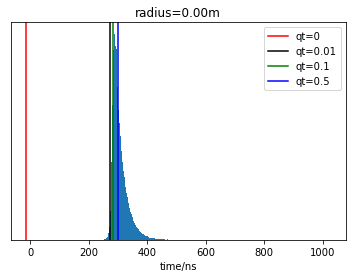

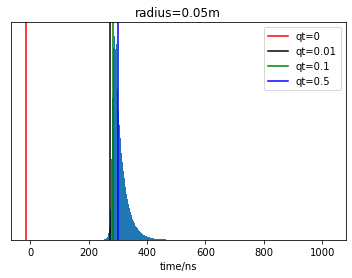

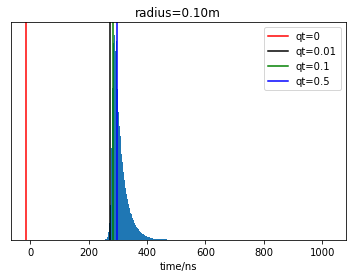

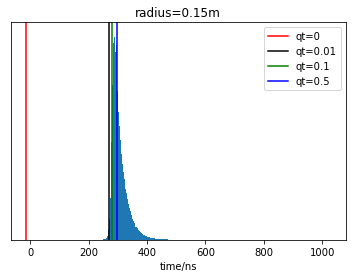

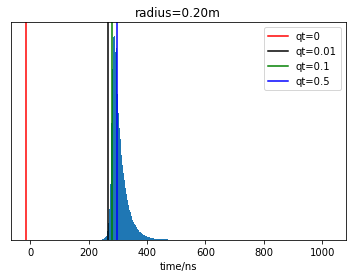

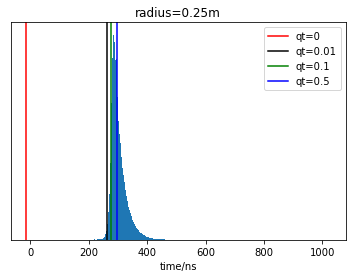

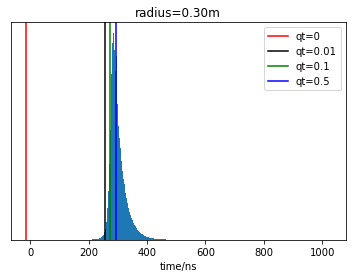

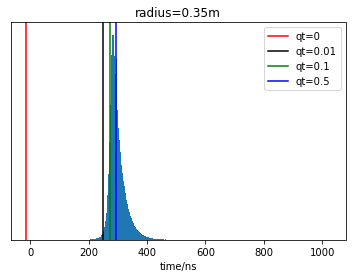

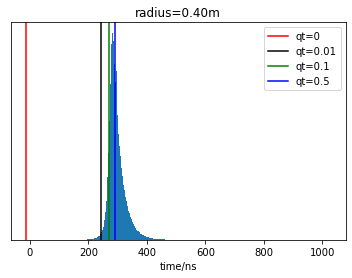

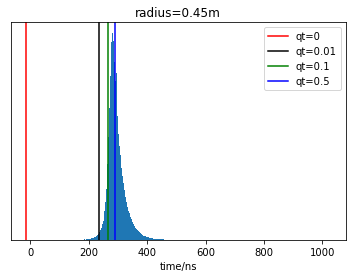

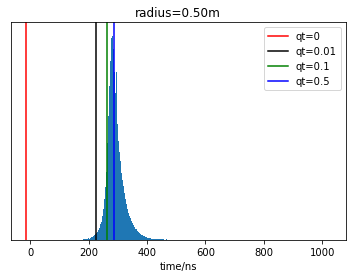

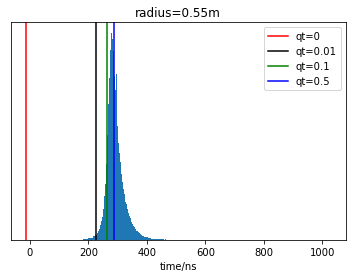

In [3]:
import tables
import matplotlib.pyplot as plt
import numpy as np
for i in np.arange(0, 0.60,0.05):
    h = tables.open_file('/mnt/stage/douwei/Simulation/1t_root/2.0MeV_015/1t_%+.2f.h5' % i)
    plt.figure()
    plt.hist(h.root.GroundTruth[:]['PETime'],bins=1000)
    plt.title('PETime')
    plt.xlabel('time/ns')
    plt.yticks([],[])
    plt.axvline(np.quantile(h.root.GroundTruth[:]['PETime'],0), color='r', label='qt=0')
    plt.axvline(np.quantile(h.root.GroundTruth[:]['PETime'],0.01), color='k', label='qt=0.01')
    plt.axvline(np.quantile(h.root.GroundTruth[:]['PETime'],0.1), color='g', label='qt=0.1')
    plt.axvline(np.quantile(h.root.GroundTruth[:]['PETime'],0.5), color='b', label='qt=0.5')
    plt.title('radius=%.2fm' % i)
    plt.legend()
    plt.savefig('PETime.png')
    plt.show()

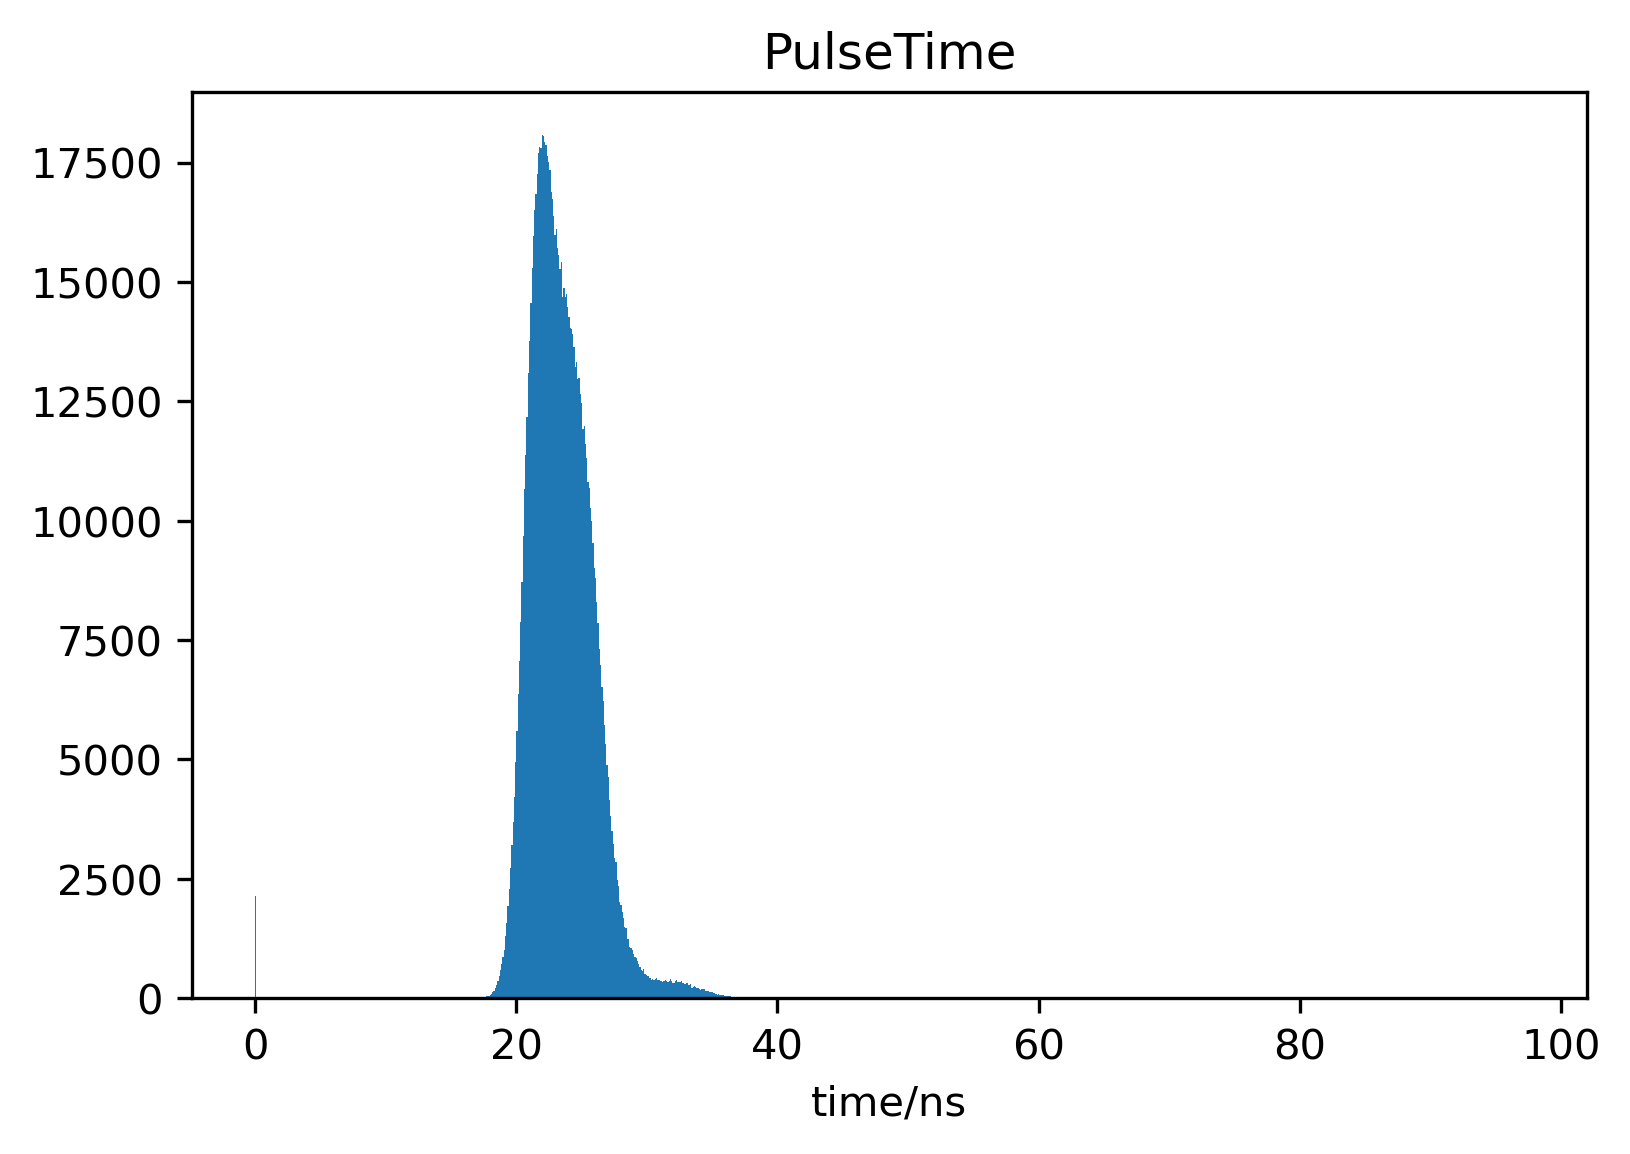

In [4]:
plt.figure(num=3, dpi=300)
plt.hist(h.root.GroundTruth[:]['PulseTime'] - h.root.GroundTruth[:]['photonTime'],bins=1000)
plt.title('PulseTime')
plt.xlabel('time/ns')
plt.show()

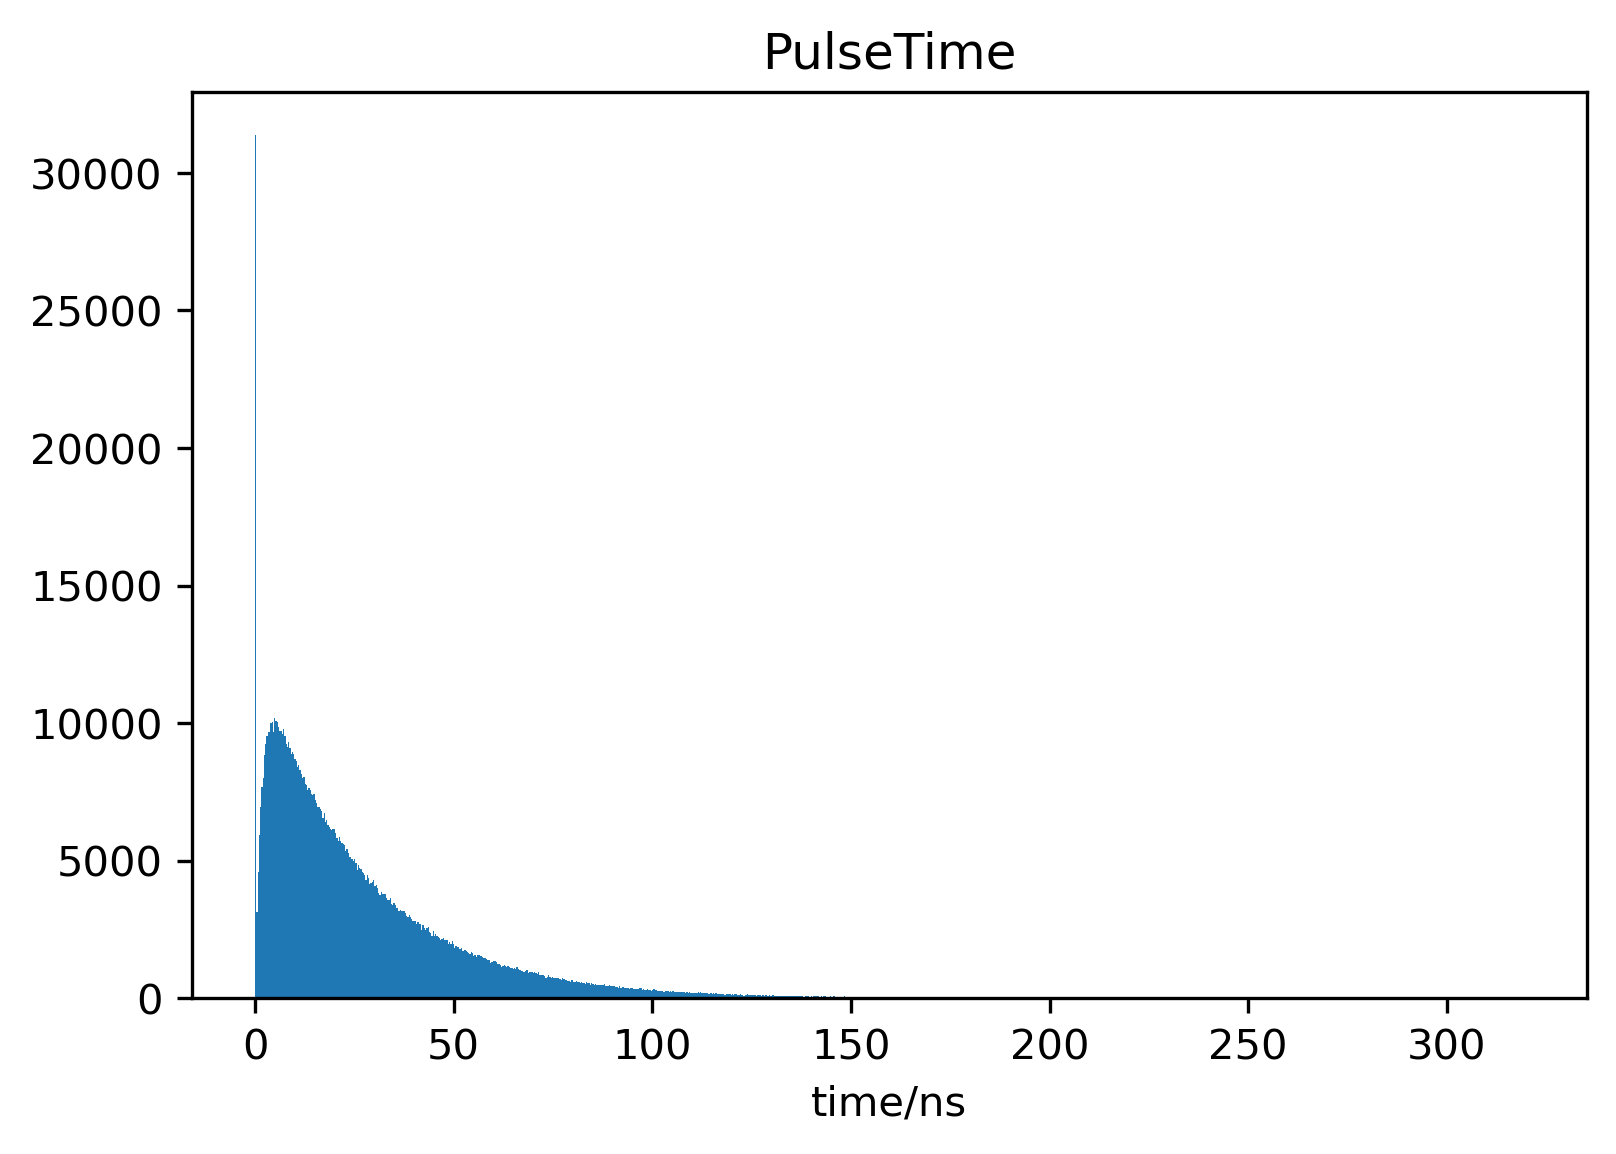

In [5]:
plt.figure(num=3, dpi=300)
plt.hist(h.root.GroundTruth[:]['photonTime'] - h.root.GroundTruth[:]['dETime'],bins=1000)
plt.title('PulseTime')
plt.xlabel('time/ns')
plt.show()

In [6]:
h.root.TruthData[:]['z']

array([550., 550., 550., ..., 550., 550., 550.])

In [7]:
A = np.array((1,2,3,4))
A = np.tile(A,(3,1))
print(A)
np.repeat(A.T, [1,2,3,4], axis=0)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


array([[1, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [3, 3, 3],
       [3, 3, 3],
       [3, 3, 3],
       [4, 4, 4],
       [4, 4, 4],
       [4, 4, 4],
       [4, 4, 4]])

In [8]:
import statsmodels.ap

ModuleNotFoundError: No module named 'statsmodels.ap'

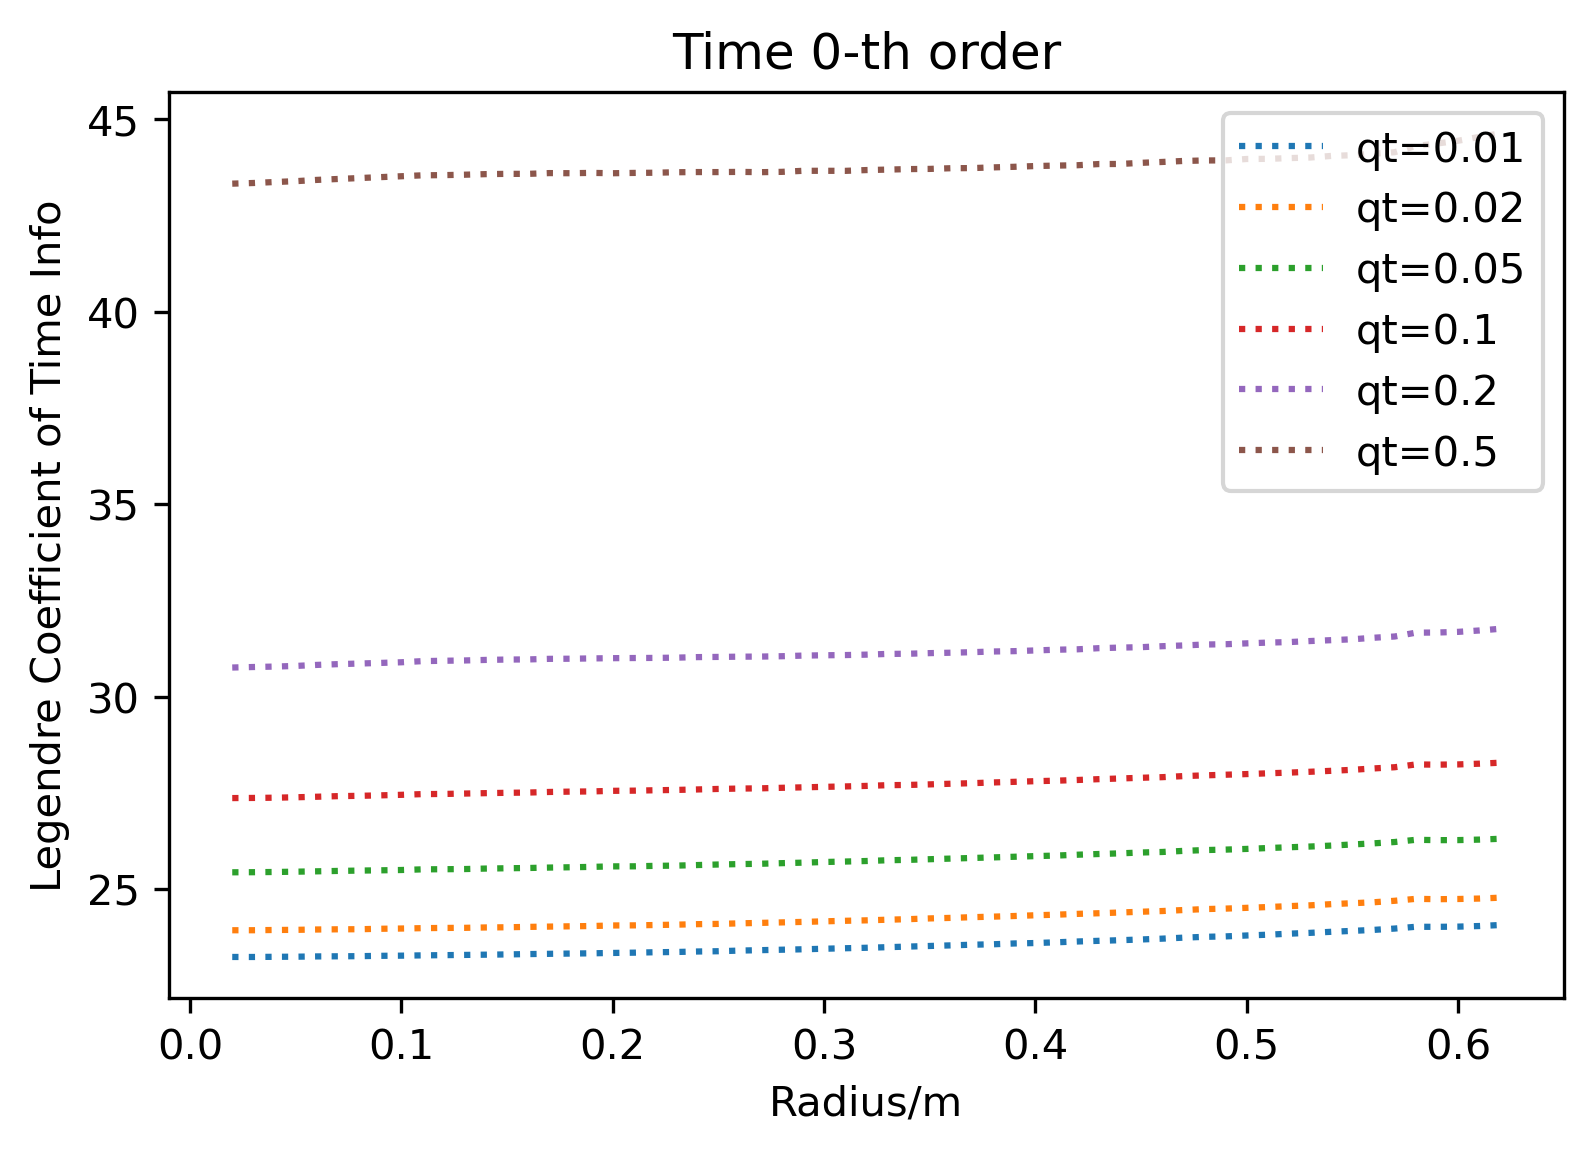

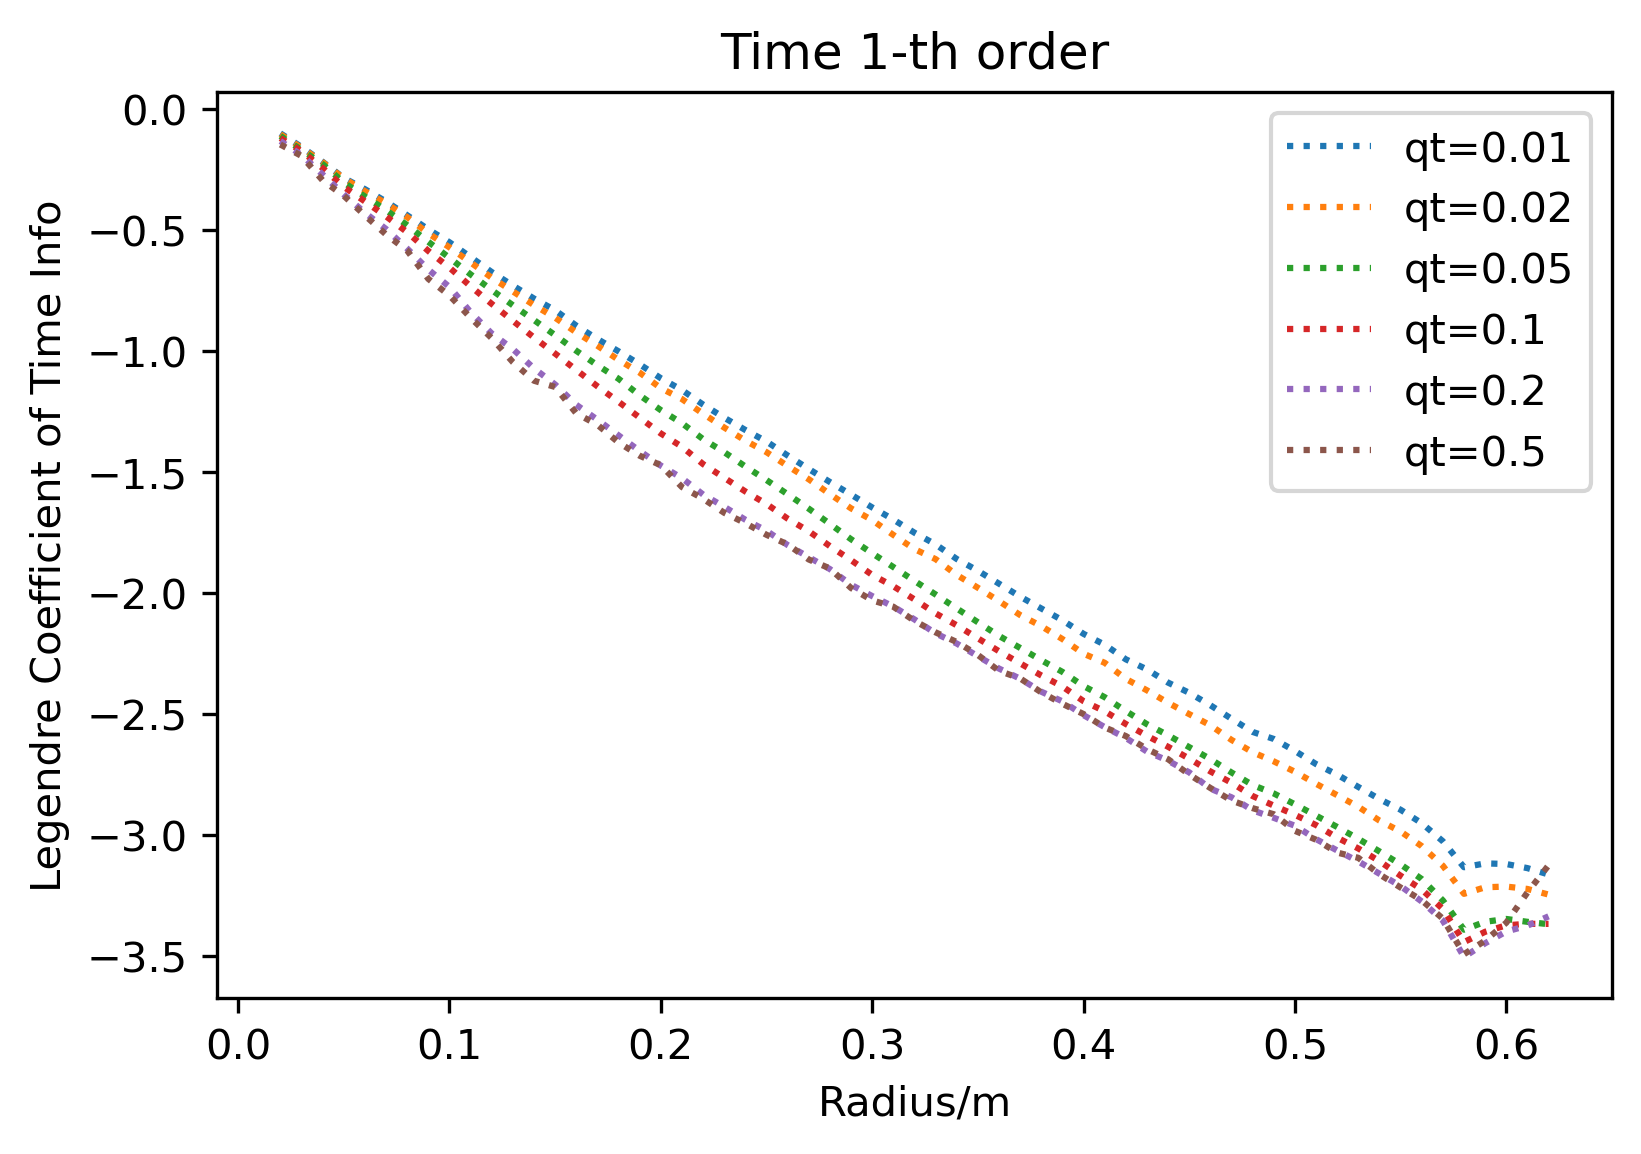

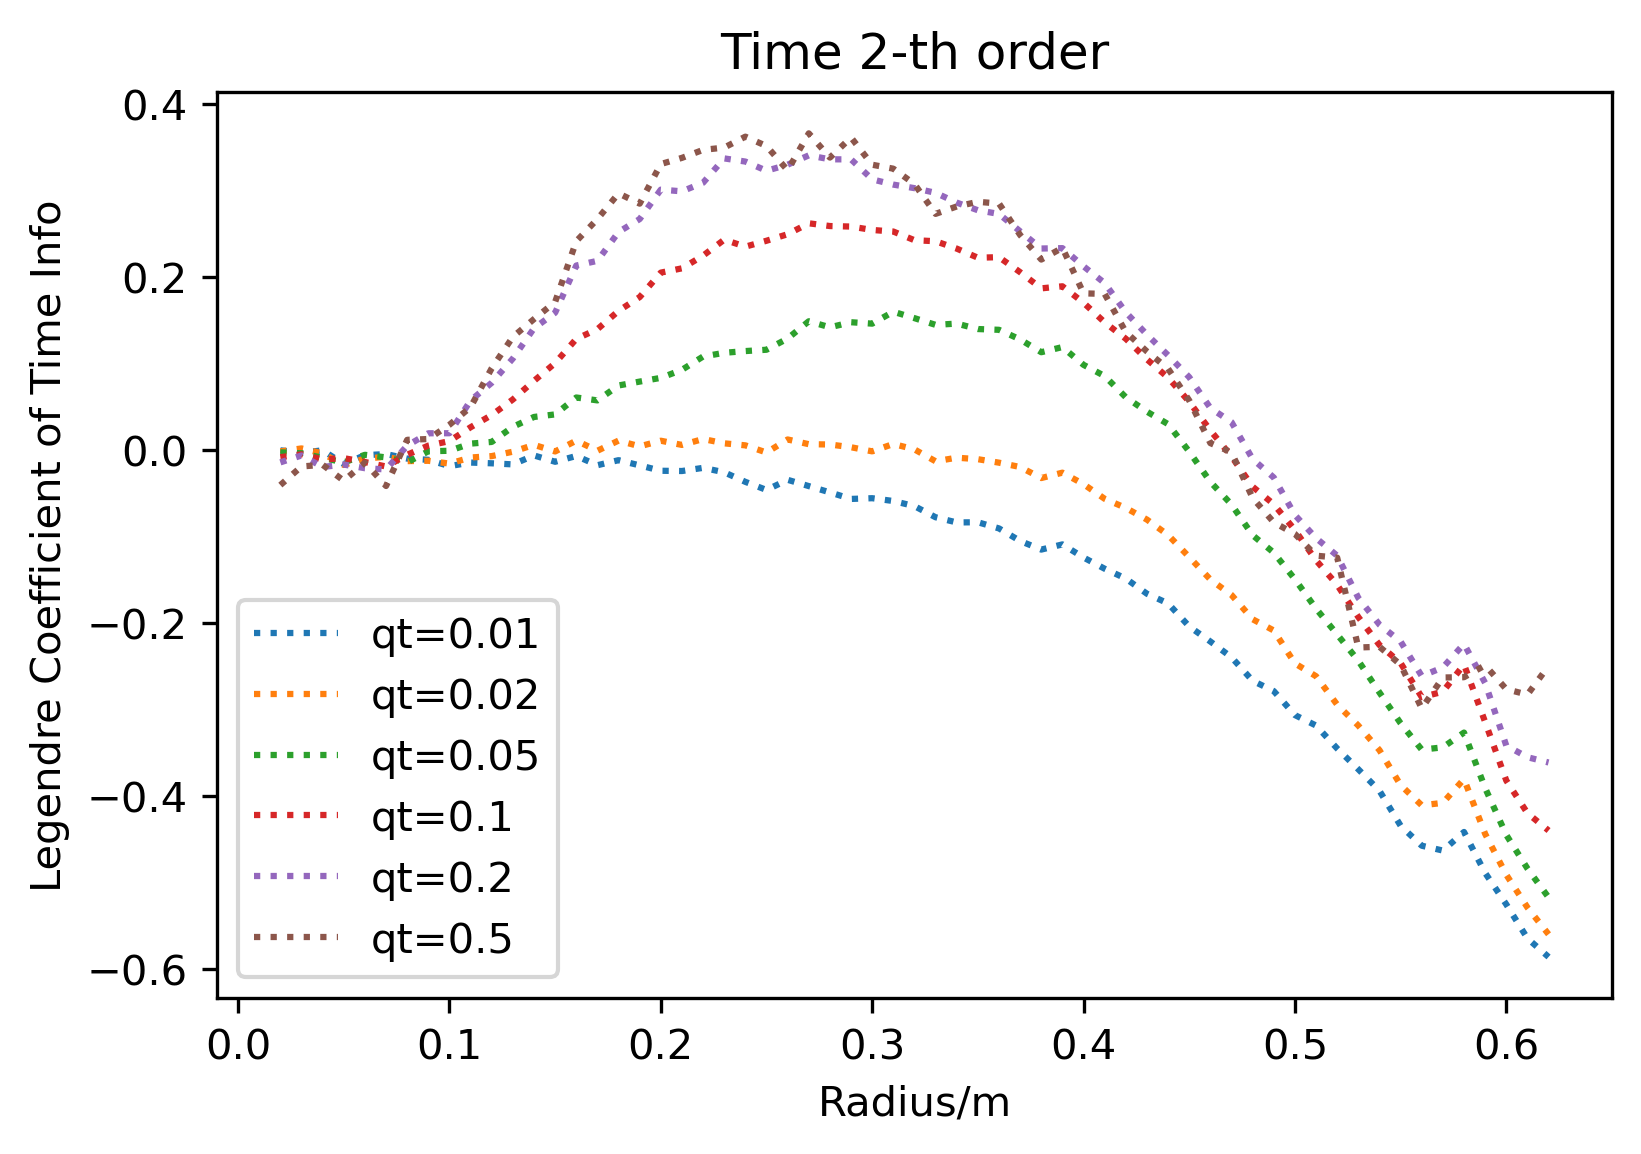

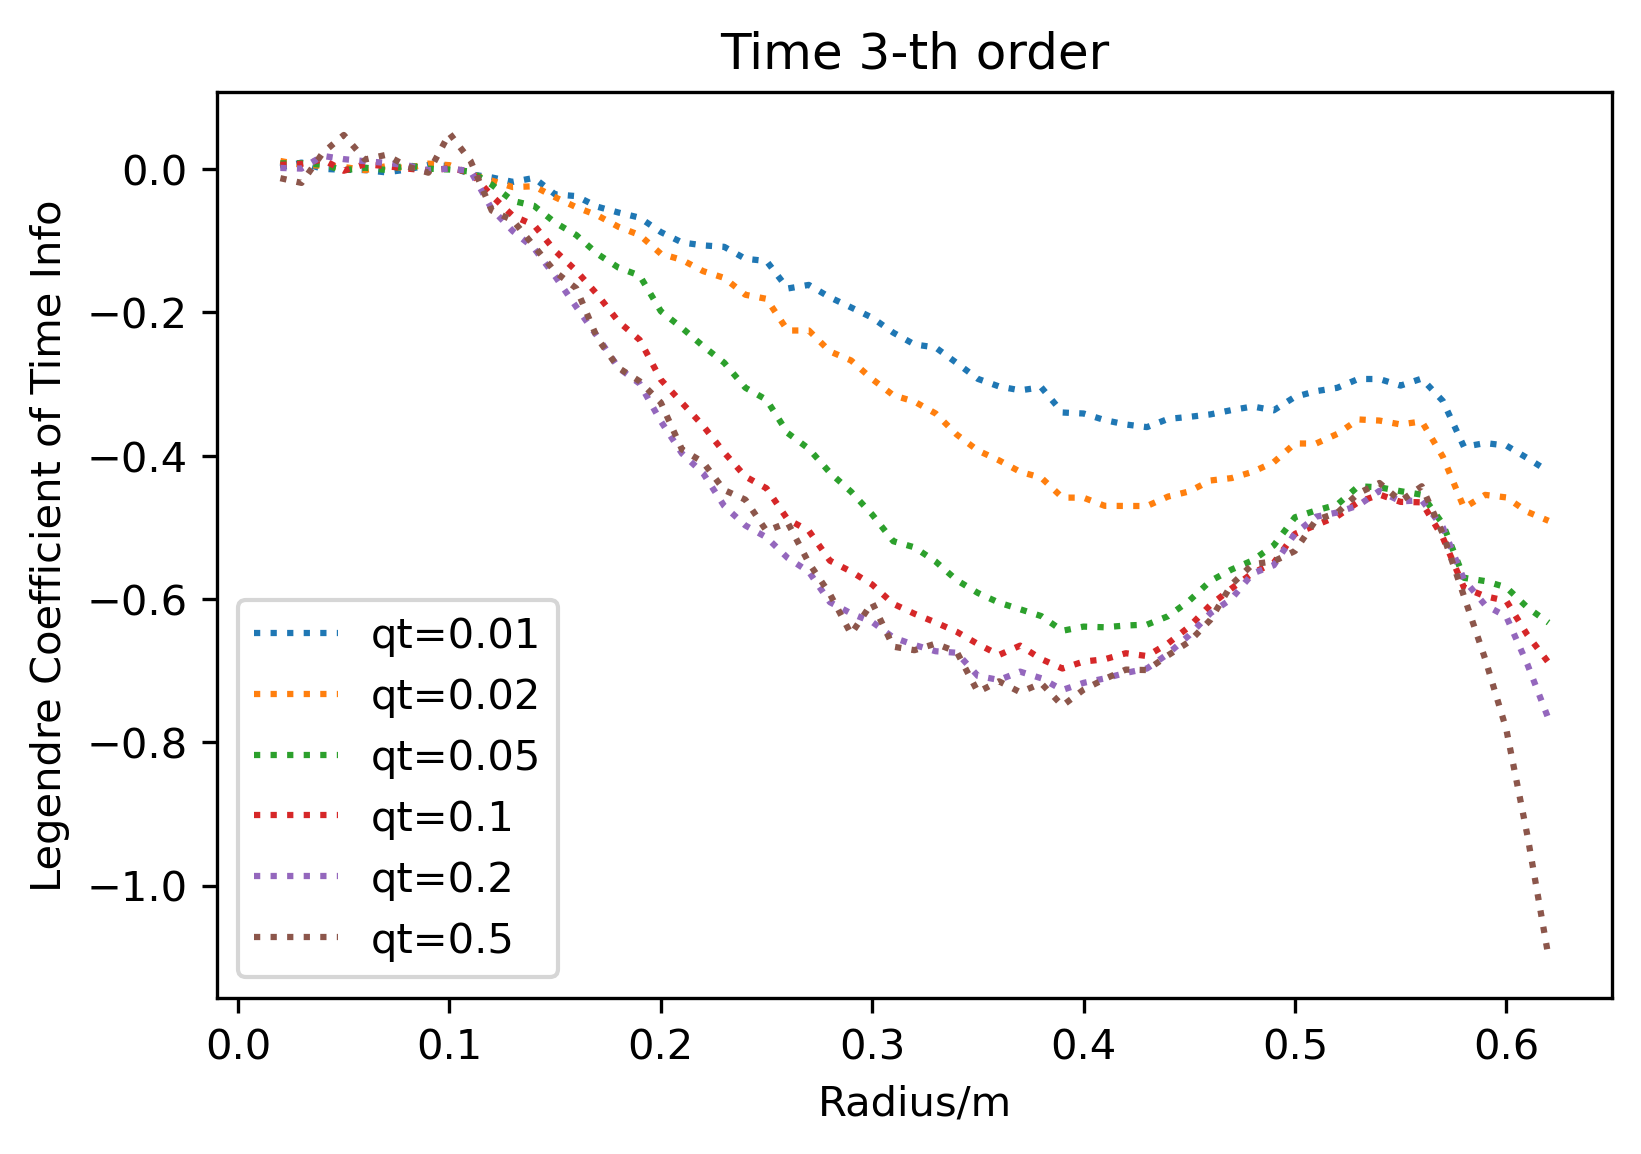

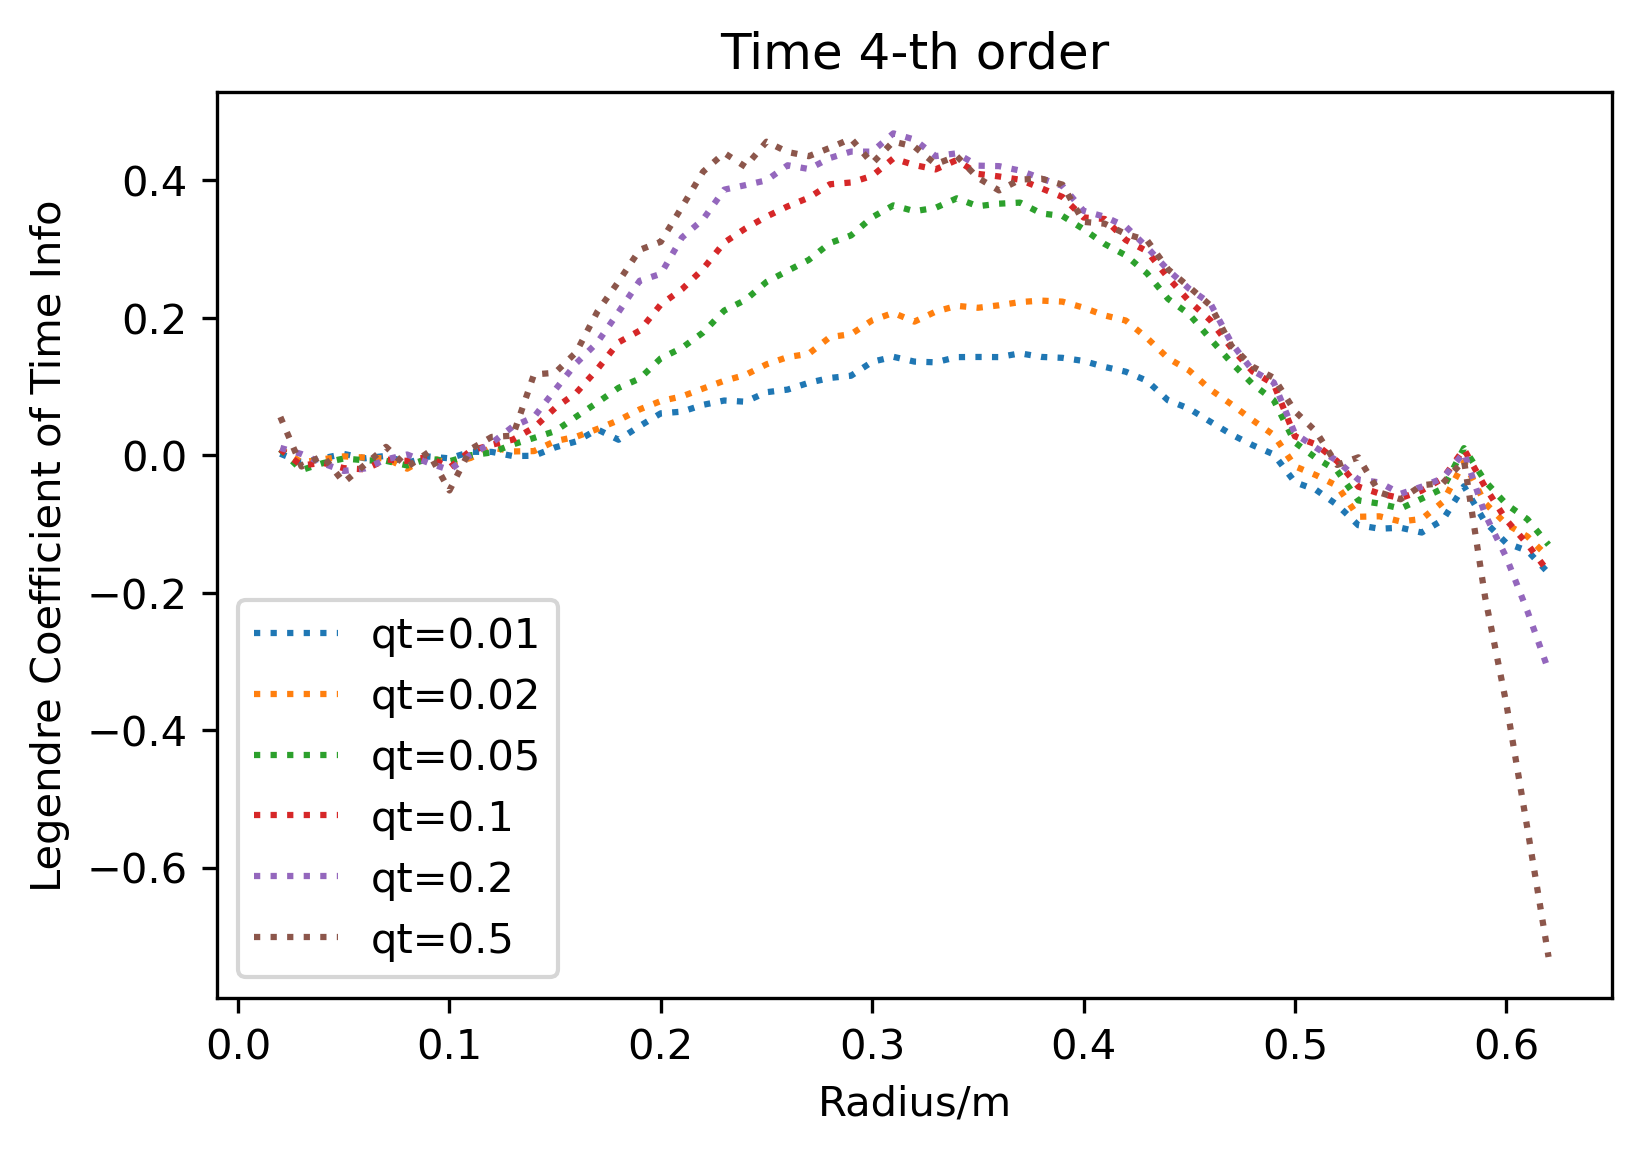

In [13]:

qt = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5])
ra = np.arange(0.01,0.650,0.01)
for q in qt:
    coeff_time = []
    for i in ra:
        try:
            h = tables.open_file('../coeff_time_1t_shell_200000_%.2f_20/file_%+.3f.h5' % (q,i))
        except:
            h = tables.open_file('../coeff_time_1t_shell_200000_%.1f_20/file_%+.3f.h5' % (q,i))
        coeff_time.append(h.root.coeff5[:])
        h.close()
    coeff_time = np.array(coeff_time)
    for i in np.arange(5):
        plt.figure(num=i+1, dpi=300)
        plt.plot(ra[1:-2], coeff_time[1:-2,i],label = f'qt={q}',linestyle='dotted')
        plt.xlabel('Radius/m')
        plt.ylabel('Legendre Coefficient of Time Info')
        plt.legend()
        plt.title('Time %d-th order' % i )

<ipython-input-26-639fd56dc687>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,i+1)
<ipython-input-26-639fd56dc687>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,i+1)
<ipython-input-26-639fd56dc687>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

<ipython-input-26-639fd56dc687>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,i+1)


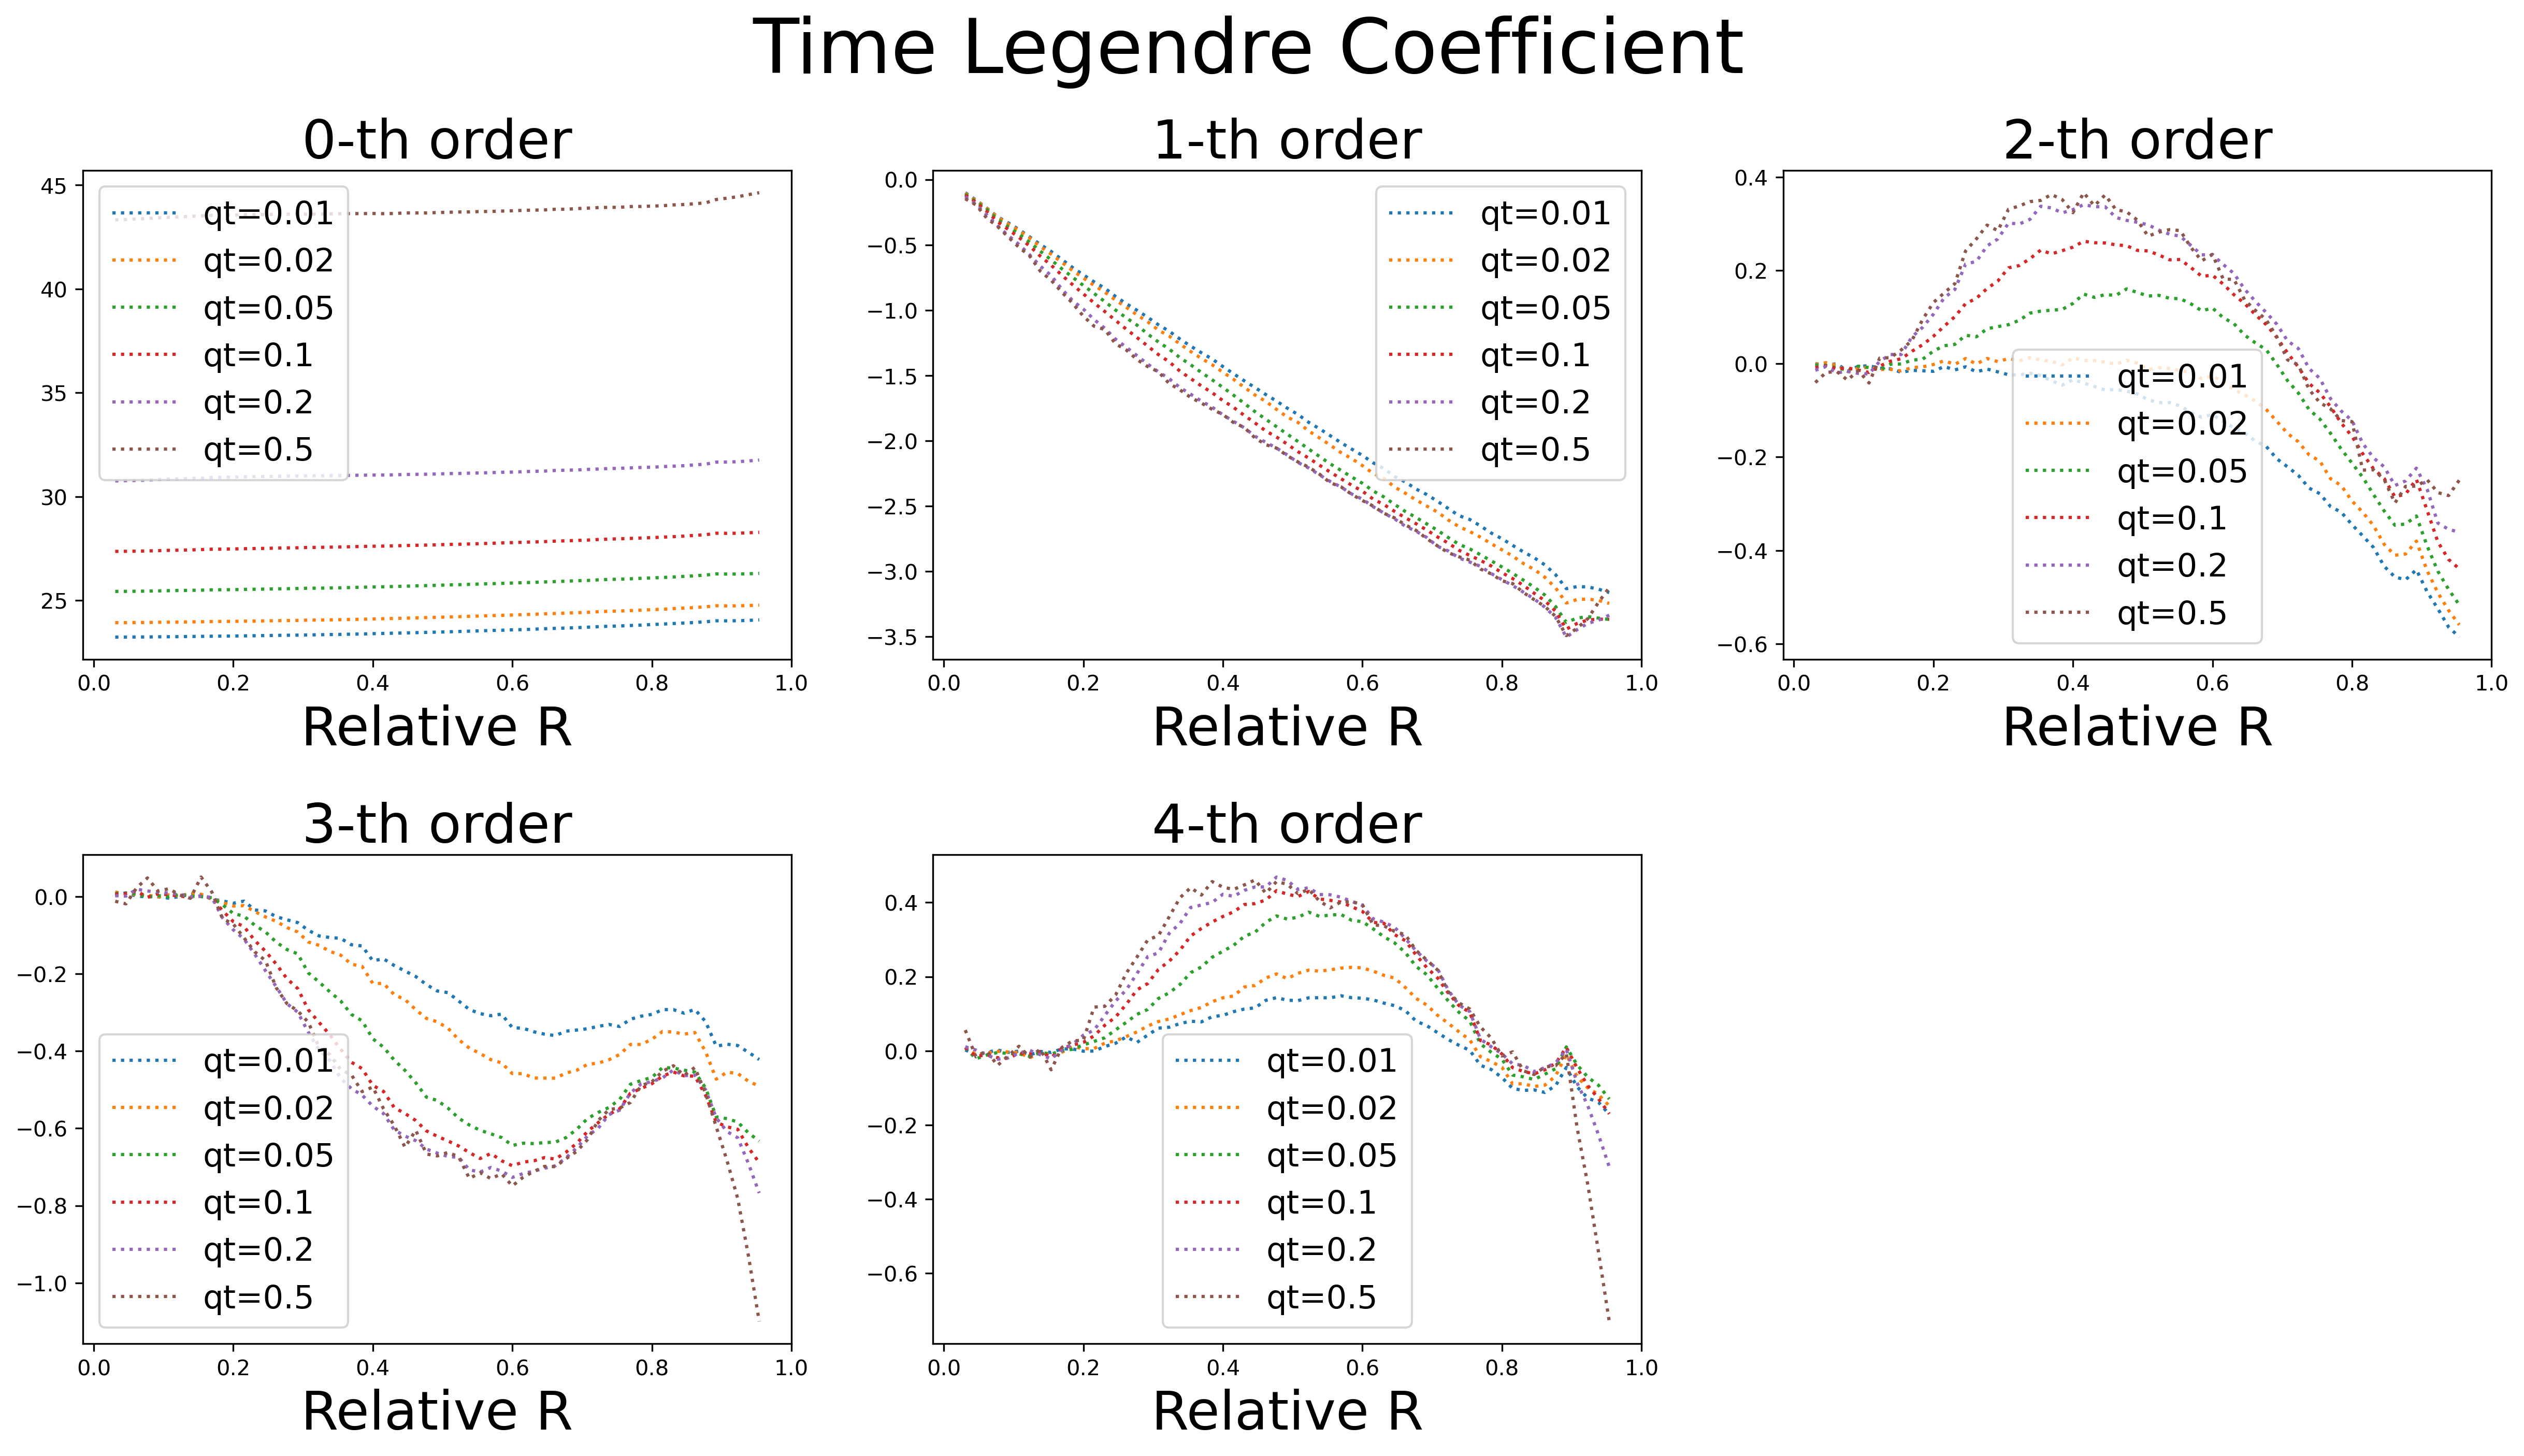

In [26]:
plt.subplots(2,3,dpi=300, figsize=(20,10), sharex=True)
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.suptitle('Time Legendre Coefficient', fontsize=35)
qt = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5])
ra = np.arange(0.01,0.650,0.01)
for q in qt:
    coeff_time = []
    for i in ra:
        try:
            h = tables.open_file('../coeff_time_1t_shell_200000_%.2f_20/file_%+.3f.h5' % (q,i))
        except:
            h = tables.open_file('../coeff_time_1t_shell_200000_%.1f_20/file_%+.3f.h5' % (q,i))
        coeff_time.append(h.root.coeff5[:])
        h.close()
    coeff_time = np.array(coeff_time)
    for i in np.arange(5):
        plt.subplot(2,3,i+1)
        plt.plot(ra[1:-2]/0.65, coeff_time[1:-2,i],label = f'qt={q}',linestyle='dotted')
        # plt.ylabel('Legendre Coefficient of Time Info')
        plt.legend(fontsize=15)
        plt.xlabel('Relative R',fontsize=25)
        # plt.ylabel('Legendre Coefficient', fontsize=25)
        # plt.legend(fontsize=25)
        plt.title('%d-th order' % i, fontsize=25)
        #plt.title('Time %d-th order' % i )
plt.subplot(2,3,6)
plt.axis('off')
plt.savefig('Time_coeff.png')

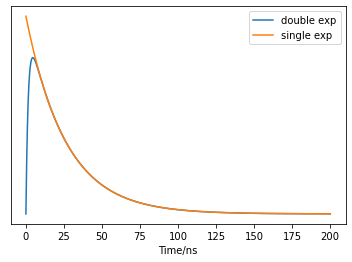

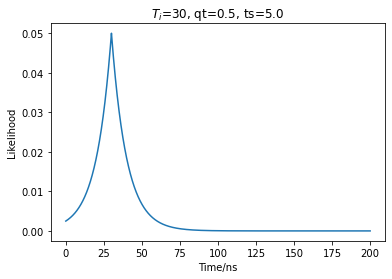

In [5]:
x = np.linspace(0,200,np.int(1e6))
tau_d = 26
tau_r = 1.6
y1 = (tau_d + tau_r)/tau_d**2 * np.exp(-x/tau_d) * (1-np.exp(-x/tau_r))
y2 = (tau_d + tau_r)/tau_d**2 * np.exp(-x/tau_d)
plt.figure()
plt.plot(x,y1, label = 'double exp')
plt.plot(x,y2, label = 'single exp')
plt.xlabel('Time/ns')
plt.yticks([],[])
plt.legend()
plt.savefig('TimeProfile.png')
plt.show()
plt.figure()
T = 30
qt = 0.5
ts = 5
H = (1-qt)*qt/ts*np.exp(-1/ts*((1-qt)*(T-x)*(x<T) + qt*(x-T)*(x>T)))
plt.plot(x,H)
plt.xlabel('Time/ns')
plt.ylabel('Likelihood')
plt.title(r'$T_i$=%d, qt=%.1f, ts=%.1f' %(T,qt,ts))
plt.savefig('LikelihoodTime.png')

In [82]:
T = 10
ts 

2540.798280204506

In [14]:
A = np.array((1,2,3,4))
B = np.tile(A,(3,1))
np.repeat(B,[1,2,3],axis=0)

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [46]:
label = np.array((1,1,1,2,2,2,4,4,4,4))
data = np.linspace(10,20,10)
H = np.bincount(label)
A = np.diag((np.ones(H.size-1)))
np.dot(np.repeat(A,H[1:],axis=0).T,data)
np.histogram(label,weights=data,bins=np.hstack((np.unique(label),np.max(label)+1)))

(array([33.33333333, 43.33333333, 73.33333333]), array([1, 2, 4, 5]))

(array([33.33333333, 43.33333333, 73.33333333]), array([1, 2, 3, 4]))